# Loading libraries. i.e., pandas, matplotlib, seaborn
Here the above libraries are loaded.

# Loading the loan data as well as data dictionary to corresponding variables

In [1]:
# pandas library
import pandas as pd

# matplotlib library
import matplotlib.pyplot as plt

# seaborn library
import seaborn as sns

# Loading the loan data to loan_data_var variable
loan_data_path_var = './loan.csv'
loan_data_var = pd.read_csv(loan_data_path_var)

# Loading the data dictionary to data_dict_var variable
data_dict_path_var = './Data_Dictionary.xlsx'
data_dict_var = pd.read_excel(data_dict_path_var)

# Display first few rows of the loan data var i.e., loan_data_var
print(loan_data_var.head())


C:\Users\Harshavardhan K\AppData\Local\Temp\ipykernel_7576\471224364.py:12: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_data_var = pd.read_csv(loan_data_path_var)


        id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ... num_tl_90g_dpd_24m  \
0   10.65%       162.87     B        B2  ...                NaN   
1   15.27%        59.83     C        C4  ...                NaN   
2   15.96%        84.33     C        C5  ...                NaN   
3   13.49%       339.31     C        C1  ...                NaN   
4   12.69%        67.79     B        B5  ...                NaN   

  num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75 pub_rec_bankruptcies  \
0                NaN            NaN               

# Data cleaning
Data cleaning happens here. Data threshold is set to 50%.
Interest rate is converted from string to float.
Numarical colums are considered for median.
Catogorical colums are considered for mode.

In [2]:
# This step is droppsing columns with high percentage of missing values
# 50% missing values so threshold_var is 0.5
threshold_var = 0.5  
loan_data_cleaned_var = loan_data_var.dropna(thresh=len(loan_data_var) * threshold_var, axis=1)

# This step is converting 'int_rate' from string to float
loan_data_cleaned_var['int_rate'] = loan_data_cleaned_var['int_rate'].str.rstrip('%').astype('float')

# These steps are handling missing values
numerical_cols_var = loan_data_cleaned_var.select_dtypes(include=['float64', 'int64']).columns
categorical_cols_var = loan_data_cleaned_var.select_dtypes(include=['object']).columns
loan_data_cleaned_var[numerical_cols_var] = loan_data_cleaned_var[numerical_cols_var].fillna(loan_data_cleaned_var[numerical_cols_var].median())
loan_data_cleaned_var[categorical_cols_var] = loan_data_cleaned_var[categorical_cols_var].fillna(loan_data_cleaned_var[categorical_cols_var].mode().iloc[0])

# These steps are converting date columns to datetime objects
date_cols_var = ['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d']
loan_data_cleaned_var[date_cols_var] = loan_data_cleaned_var[date_cols_var].apply(pd.to_datetime, errors='coerce')


C:\Users\Harshavardhan K\AppData\Local\Temp\ipykernel_7576\817058468.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data_cleaned_var['int_rate'] = loan_data_cleaned_var['int_rate'].str.rstrip('%').astype('float')
C:\Users\Harshavardhan K\AppData\Local\Temp\ipykernel_7576\817058468.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data_cleaned_var[numerical_cols_var] = loan_data_cleaned_var[numerical_cols_var].fillna(loan_data_cleaned_var[numerical_cols_var].median())
C:\Users\Harshavardhan

# Univariate Analysis:
## Univariate Analysis: Loan Status Distribution
Dominant Status - Fully Paid: There is a large majority (approximately 83%) of loans are in the 'Fully Paid' status, indicating successful repayment. So it is good to have.

Significant Charged Off Rate: About 14% of loans are 'Charged Off', signifying a notable portion of loans where borrowers have defaulted. Need to have mesures to mitigate these.

Minor Proportion of Current Loans: Only around 2.9% of loans are currently ongoing ('Current'). This is a small fraction compared to fully paid and charged-off loans. So this is good.

Indicator of Good Credit Decisions: The high percentage of 'Fully Paid' loans suggests effective credit decision-making and loan management. Good to have.

Need for Risk Mitigation: The presence of a substantial 'Charged Off' rate points to the need for improved risk assessment and mitigation strategies.

Portfolio Health: The good proportion of loans being fully paid is a positive sign of the portfolio's overall health.

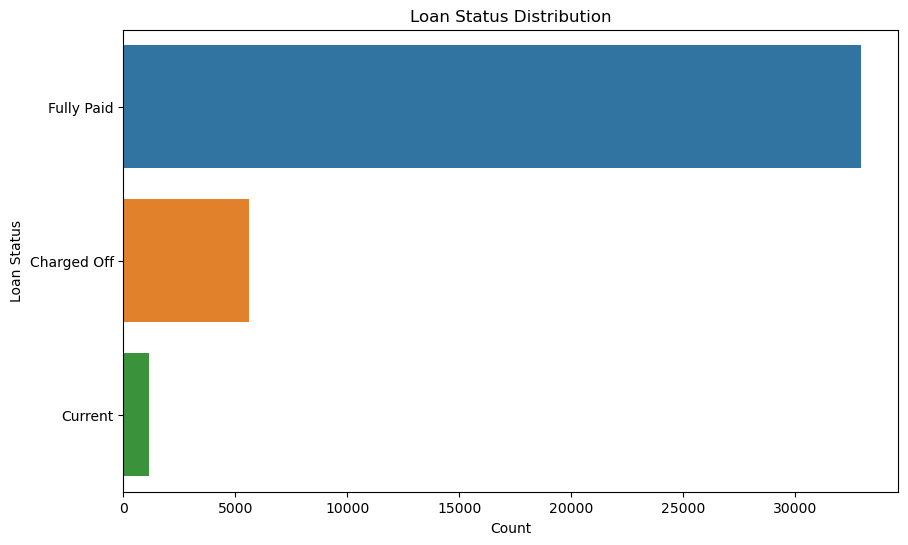

In [3]:
# Univariate Analysis: Loan Status Distribution
plt.figure(figsize=(10, 6))
sns.countplot(y='loan_status', data=loan_data_cleaned_var, order=loan_data_cleaned_var['loan_status'].value_counts().index)
plt.title('Loan Status Distribution')
plt.xlabel('Count')
plt.ylabel('Loan Status')
plt.show()


## Univariate Analysis: Loan Amount Distribution
Average Loan Amount: The average (i.e., mean) loan amount is approximately $11,219.

Range of Loan Amounts: Loan amounts range from a minimum of $500 to a maximum of $35,000.

Standard Deviation: The standard deviation is about $7,457. This is indicating variability in the loan amounts.

Most Common Loan Amounts: The median loan amount is $10,000, suggesting that half of the loans are below this amount and half are above.

Distribution Spread: The 25th percentile is at $5,500  and  the  75th  percentile  is  at  $15,000, indicating a spread of loan amounts in the middle 50 percent of the data.

Loan Amount Preferences: The data suggests a preference or tendency towards mid-range loan amounts among borrowers.

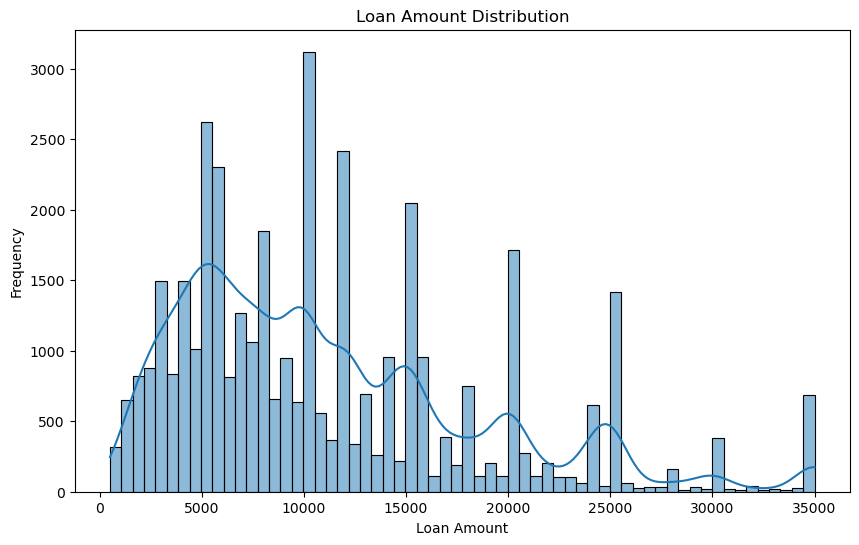

In [4]:
# Univariate Analysis: Loan Amount Distribution
plt.figure(figsize=(10, 6))
sns.histplot(loan_data_cleaned_var['loan_amnt'], kde=True)
plt.title('Loan Amount Distribution')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()



## Univariate Analysis: Interest Rate Distribution
Average Interest Rate: The mean interest rate across all loans is approximately 12.02%. This is indicating the average cost of borrowing.

Higher Rates for Riskier Loans: The presence of higher rates (up to 24.59%) may indicate loans issued to individuals with higher risk factors such as lower credit scores or unstable income.

Variability in Rates: There is a notable variation in interest rates (standard deviation of about 3.72%). This is suggesting diverse risk profiles among borrowers.

Most Common Rates: The median interest rate is 11.86%, with half of the loans having rates below this value and half above. This is indicating the central tendency of the rates.

Range of Interest Rates: Interest rates range from a low of 5.42% to a high of 24.59%. This is reflecting a wide spectrum of creditworthiness and loan terms.

Competitive Rates for Lower Risks: The lower end of the spectrum (5.42%) suggests competitive rates offered to borrowers with better credit profiles.

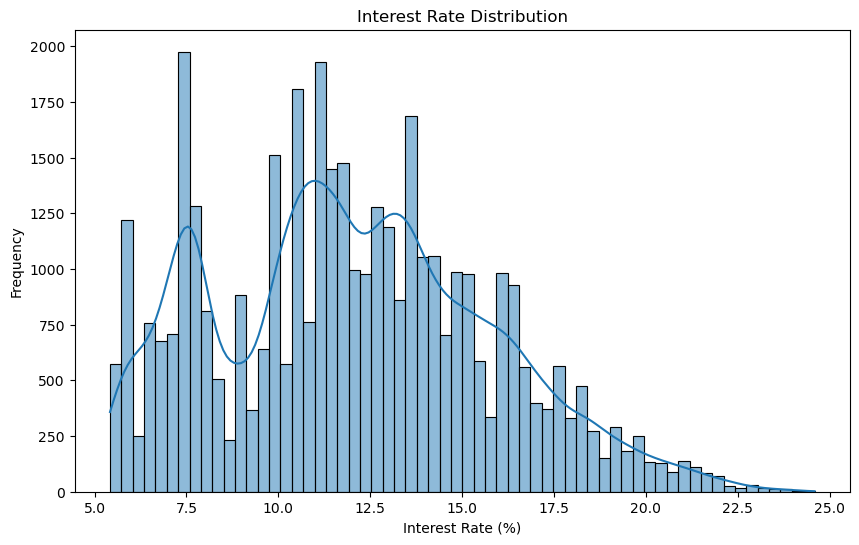

In [5]:
# Univariate Analysis: Interest Rate Distribution
plt.figure(figsize=(10, 6))
sns.histplot(loan_data_cleaned_var['int_rate'], kde=True)
plt.title('Interest Rate Distribution')
plt.xlabel('Interest Rate (%)')
plt.ylabel('Frequency')
plt.show()


## Univariate Analysis: Annual Income Distribution
Average Annual Income: The average annual income of borrowers is approximately $68,969. This is indicating the general income level of the loan applicants.

Median Income: The median annual income is $59,000, which is lower than the average. This is hinting at a right-skewed distribution where a smaller number of high-income individuals push the average up.

Variability in Income Levels: The standard deviation is quite high (around $63,794). This is indicating substantial variability in the income levels of the borrowers.

Wide Range of Incomes: There's a significant range in annual incomes, from as low as $4,000 to as high as $6,000,000, suggesting a diverse borrower base.

Income Distribution: 25% of borrowers earn $40,404 or less, and 75% earn $82,300 or less. This is implying that the majority of borrowers are in the middle to lower income brackets.

Implications for Lending: The wide range in incomes, along with the higher average compared to the median, suggests that the loan data includes both high-earning borrowers and those with relatively modest incomes, which could influence loan terms and risk assessments.

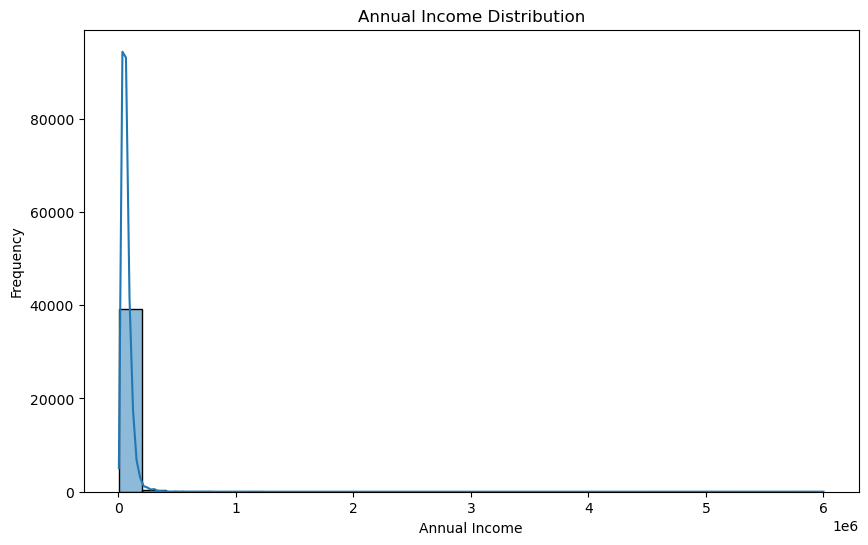

In [6]:
# Univariate Analysis: Annual Income Distribution
plt.figure(figsize=(10, 6))
sns.histplot(loan_data_cleaned_var['annual_inc'], bins=30, kde=True)
plt.title('Annual Income Distribution')
plt.xlabel('Annual Income')
plt.ylabel('Frequency')
plt.show()



## Univariate Analysis: Debt-to-Income Ratio Distribution
Average DTI Ratio: The average DTI ratio is approximately 13.32%. This is indicating the average proportion of borrowers' income going towards debt payments.

Variability in DTI Ratios: There is notable variability in DTI ratios among borrowers (standard deviation of about 6.68%), reflecting different levels of debt burden relative to income.

Median DTI Ratio: The median DTI ratio is 13.4%, suggesting that half of the borrowers have a lower debt burden relative to their income and half have a higher burden.

Income Utilization for Debts: A higher DTI ratio means a larger portion of income is used for debt payments. This can be an important factor in assessing loan affordability and risk.

Range of DTI Ratios: DTI ratios range from 0% to nearly 30%. This is showing a wide spectrum of debt burden among borrowers.

Creditworthiness Indication: Lower DTI ratios might indicate better creditworthiness and financial stability, while higher ratios could signal potential risk in lending.

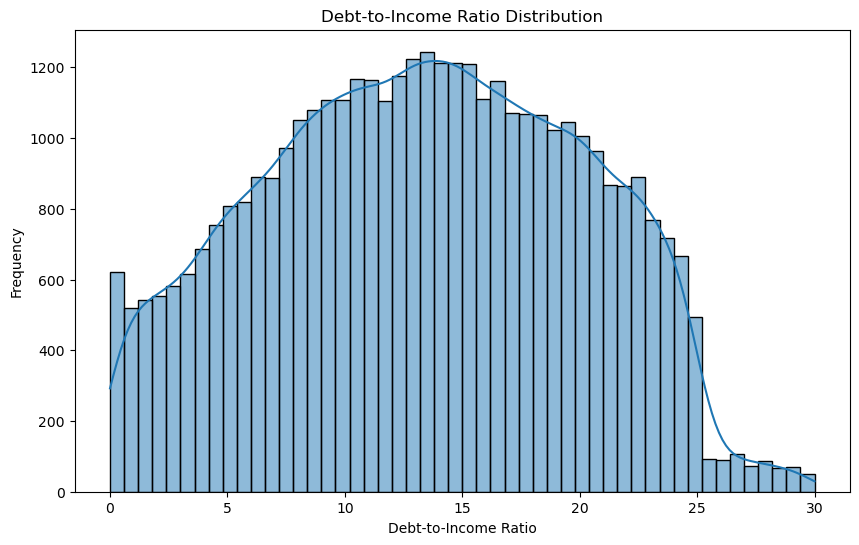

In [7]:
# Univariate Analysis: Debt-to-Income Ratio Distribution
plt.figure(figsize=(10, 6))
sns.histplot(loan_data_cleaned_var['dti'], kde=True)
plt.title('Debt-to-Income Ratio Distribution')
plt.xlabel('Debt-to-Income Ratio')
plt.ylabel('Frequency')
plt.show()



## Univariate Analysis: Employment Length Distribution
Dominant Employment Length: The most common employment length is '10+ years'. This is accounting for approximately 23% of borrowers. This suggests a significant portion of borrowers have a long employment history.

Stable Employment Indicator: A large number of borrowers with over 10 years of employment may indicate financial stability, which is a positive sign for lenders.

Middle-Range Employment: Employment lengths of 4 to 9 years represent a smaller but notable portion of the borrower base. This is reflecting a mix of mid-career individuals.

Distribution Across Categories: Employment lengths are well-distributed across different categories, with '2 years', '3 years', and '< 1 year' also being common durations, each constituting around 11% to 12% of borrowers.

Variety in Employment Lengths: The presence of borrowers across all employment lengths suggests a diverse borrower base in terms of job stability and career stage.

Short-Term Employment Representation: The data also includes a significant proportion of borrowers with less than one year of employment, highlighting the inclusion of relatively new entrants into the workforce or those who may have recently changed jobs.


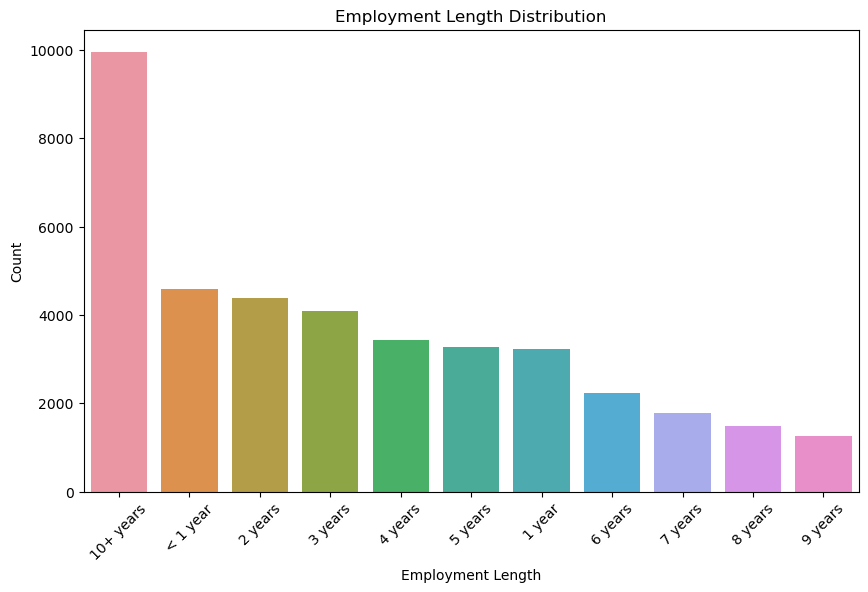

In [8]:
# Univariate Analysis: Employment Length Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='emp_length', data=loan_data_cleaned_var, order=loan_data_cleaned_var['emp_length'].value_counts().index)
plt.title('Employment Length Distribution')
plt.xlabel('Employment Length')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


# Bivariate Analysis details
## Bivariate Analysis: Loan Status vs Loan Amount
Variation Across Loan Statuses: The distribution of loan amounts varies significantly across different loan statuses.

Similar Ranges for Fully Paid and Charged Off: Both 'Fully Paid' and 'Charged Off' categories have a wide range of loan amounts, but the upper quartile of 'Charged Off' loans is notably higher.

Implications for Risk Management: The analysis suggests the need for closer scrutiny of higher loan amounts, as they may carry a higher risk of not being fully repaid.

Higher Amounts in Charged Off Loans: 'Charged Off' loans tend to have higher median loan amounts compared to 'Fully Paid' loans, suggesting that higher loan amounts might be associated with a greater risk of default.

Current Loans Distribution: Loans that are currently 'Current' have a distribution similar to 'Fully Paid' loans. This is indicating similar loan amount preferences among borrowers who are actively repaying.

Outliers and Variability: The presence of outliers, especially in the 'Charged Off' category, indicates that a few loans have significantly higher amounts. This could be risk factors for default.



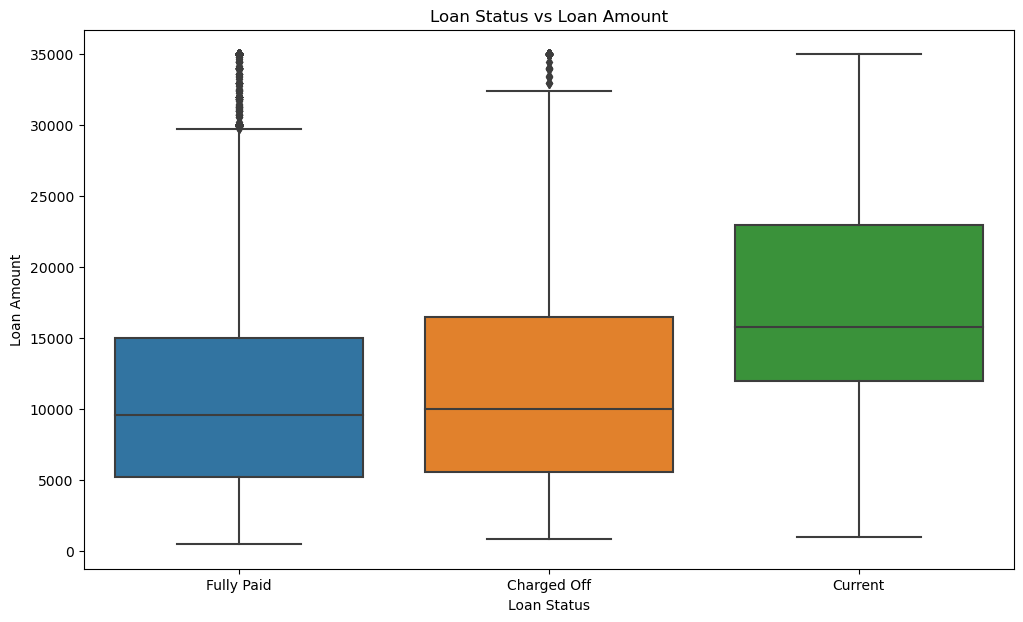

In [9]:
# Bivariate Analysis details
# Bivariate Analysis: Loan Status vs Loan Amount
plt.figure(figsize=(12, 7))
sns.boxplot(x='loan_status', y='loan_amnt', data=loan_data_cleaned_var)
plt.title('Loan Status vs Loan Amount')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount')
plt.show()



## Bivariate Analysis: Loan Status vs Interest Rate
Higher Rates for Charged Off Loans: There's a noticeable trend of higher interest rates associated with 'Charged Off' loans, which suggests that loans with higher interest rates are more likely to default.

Importance of Interest Rate in Loan Performance: The clear distinction in interest rates across different loan statuses underscores the importance of interest rate as a factor in loan performance and borrower's ability to repay.

Variability in Rates: The range of interest rates is quite broad for all loan statuses, but particularly so for 'Charged Off' loans, suggesting that higher risk loans (as indicated by higher rates) don't always result in default, but the risk is increased.

Lower Rates for Fully Paid Loans: Loans that are 'Fully Paid' generally have lower interest rates, indicating that borrowers with lower rates are more likely to successfully repay their loans.

Current Loans Interest Rates: Loans currently in the 'Current' status have interest rates that are somewhat in between those of 'Fully Paid' and 'Charged Off' loans. This might reflect ongoing loans with varying risk profiles.

Risk Assessment Implication: The higher interest rates for 'Charged Off' loans could reflect the lender’s initial risk assessment, where higher rates were likely offered to riskier borrowers.



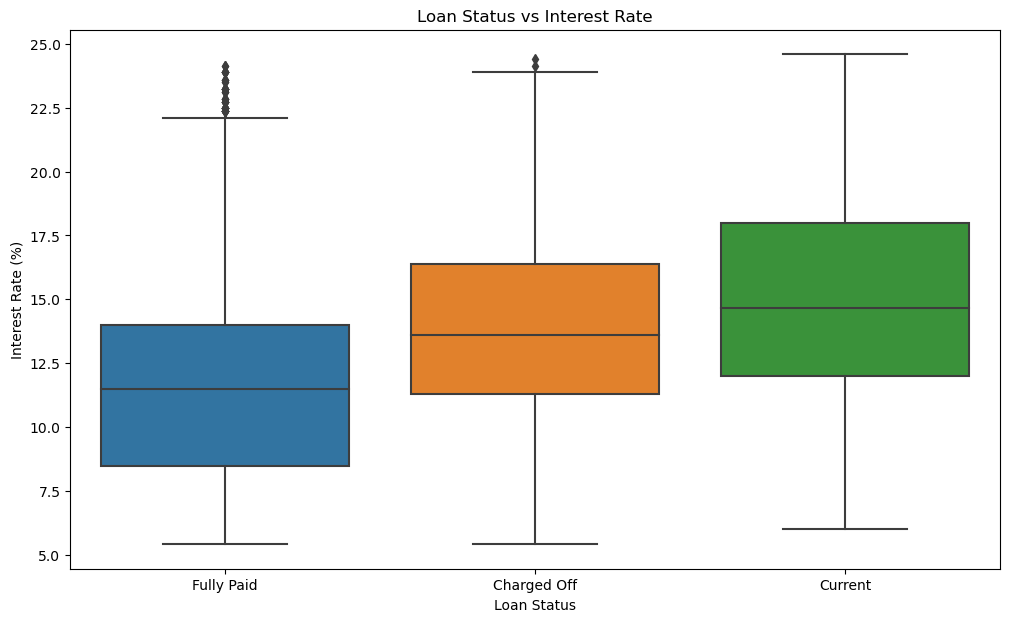

In [10]:
# Bivariate Analysis: Loan Status vs Interest Rate
plt.figure(figsize=(12, 7))
sns.boxplot(x='loan_status', y='int_rate', data=loan_data_cleaned_var)
plt.title('Loan Status vs Interest Rate')
plt.xlabel('Loan Status')
plt.ylabel('Interest Rate (%)')
plt.show()



## Bivariate Analysis: Loan Amount vs Annual Income
Outliers and Exceptions: Some outliers are present where individuals with relatively lower annual incomes have high loan amounts. This could be cases requiring special attention for risk assessment.

Implications for Lending Policies: Understanding this relationship can help in tailoring lending policies and loan offers, ensuring that borrowers are not over-leveraged relative to their income.

Positive Correlation: There appears to be a positive correlation between loan amount and annual income. This is indicating that borrowers with higher incomes tend to take larger loans.

Variability at Lower Income Levels: There is significant variability in loan amounts for borrowers with lower annual incomes, suggesting that factors other than income might play a significant role in determining the loan amount for these individuals.

Cap on Loan Amounts: Despite increases in income, the loan amounts seem to plateau. This suggests that there might be a cap on the loan amounts that can be borrowed, regardless of higher income levels.

Diverse Borrower Base: The scatterplot shows a wide range of incomes and loan amounts, indicating a diverse borrower base with varying financial needs and capabilities.



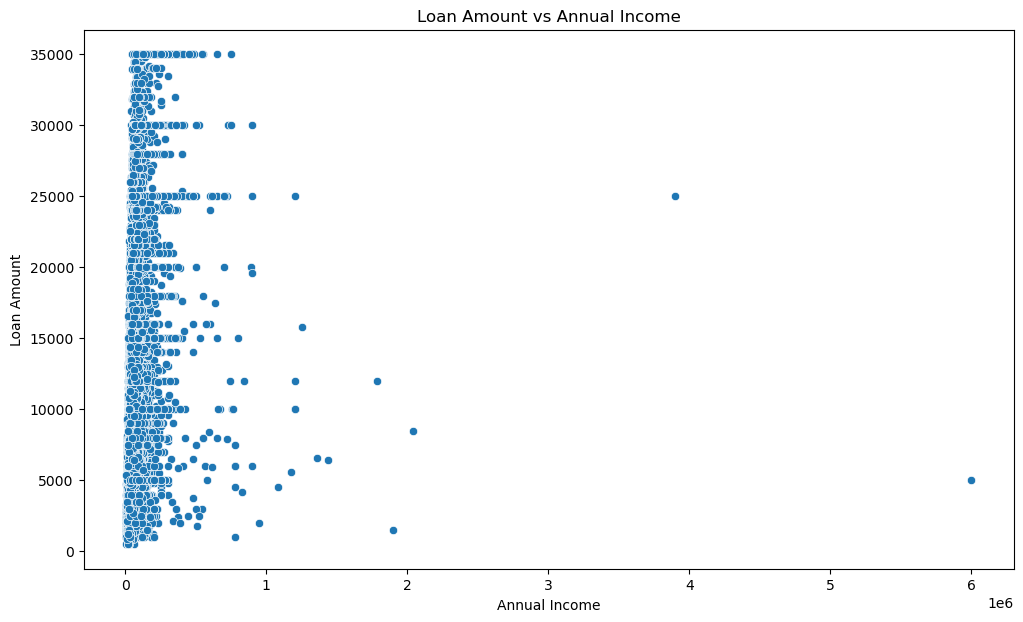

In [11]:
# Bivariate Analysis: Loan Amount vs Annual Income
plt.figure(figsize=(12, 7))
sns.scatterplot(x='annual_inc', y='loan_amnt', data=loan_data_cleaned_var)
plt.title('Loan Amount vs Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Loan Amount')
plt.show()



## Bivariate Analysis: Debt-to-Income Ratio vs Loan Status
DTI Range for Current Loans: Loans that are currently 'Current' show a DTI distribution similar to 'Fully Paid' loans, which might indicate that ongoing loans have manageable debt levels relative to income.

Debt Burden and Loan Performance: While DTI is an important measure of debt burden, its similar distribution across loan statuses suggests that other factors, in addition to DTI, are influential in determining loan performance.

Risk Assessment Implication: Lenders might consider DTI as one of several factors in assessing loan risk, given its modest differentiation power in loan performance.

Similar DTI Across Loan Statuses: The median DTI appears to be relatively similar across different loan statuses. This is suggesting that DTI alone may not be a strong differentiator in predicting loan default.

Slight Increase in DTI for Charged Off Loans: The 'Charged Off' loans exhibit a slightly higher median DTI compared to 'Fully Paid' loans, indicating a potential but modest association between higher DTI and loan default.

Variability and Outliers: There is noticeable variability and presence of outliers in the DTI for all loan statuses, particularly for 'Charged Off' loans. This may imply that extreme DTI values could be linked to higher default risks.


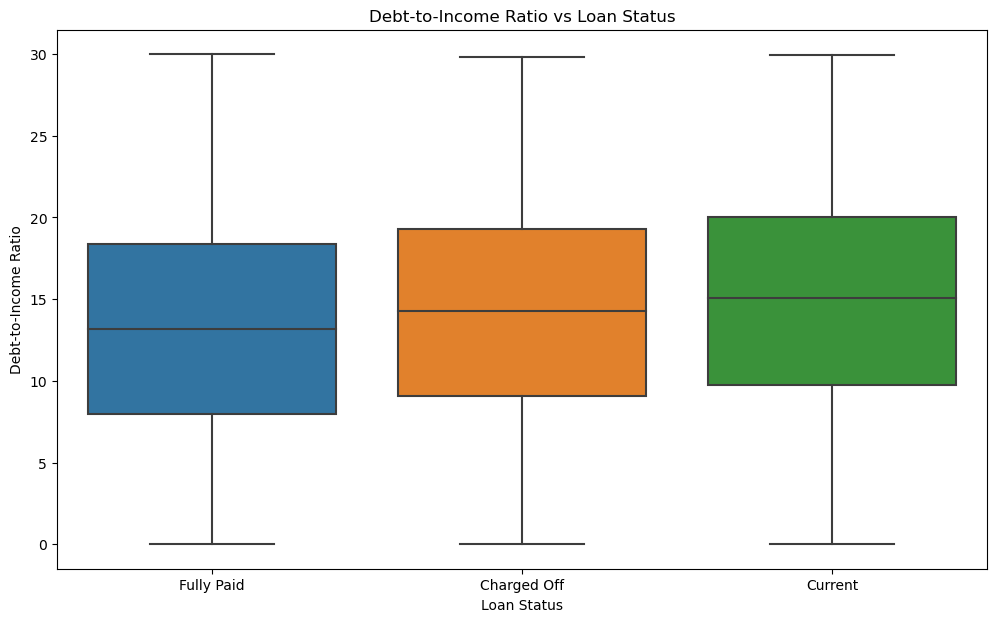

In [12]:
# Bivariate Analysis: Debt-to-Income Ratio vs Loan Status
plt.figure(figsize=(12, 7))
sns.boxplot(x='loan_status', y='dti', data=loan_data_cleaned_var)
plt.title('Debt-to-Income Ratio vs Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Debt-to-Income Ratio')
plt.show()


# Multivariate Analysis
## Multivariate Analysis: Loan Status, Loan Amount, and Interest Rate
Higher Loan Amounts in Charged Off Loans: 'Charged Off' loans tend to have higher loan amounts compared to 'Fully Paid' loans. This suggests a correlation between higher loan amounts and increased likelihood of default.

Loan Amount Distribution: The distribution of loan amounts is fairly consistent across different loan statuses, but with a noticeable increase in the median and upper quartiles for 'Charged Off' loans.

Risk Management Implications: The analysis underscores the importance of considering both loan amount and interest rate in assessing loan risk. It suggests a need for a balanced approach in loan underwriting, taking into account both the size of the loan and the cost to the borrower.

Higher Rates Indicative of Higher Risk: The elevated interest rates for 'Charged Off' loans likely reflect the higher risk assessed at the time of loan origination.

Current Loans Characteristics: Loans in the 'Current' status exhibit loan amounts and interest rates that fall between those of 'Fully Paid' and 'Charged Off' loans, suggesting ongoing loans have varied risk profiles.

Interest Rate Variation Across Loan Statuses: The interest rates are generally higher for 'Charged Off' loans than for 'Fully Paid' loans, indicating that loans with higher interest rates are more prone to default.


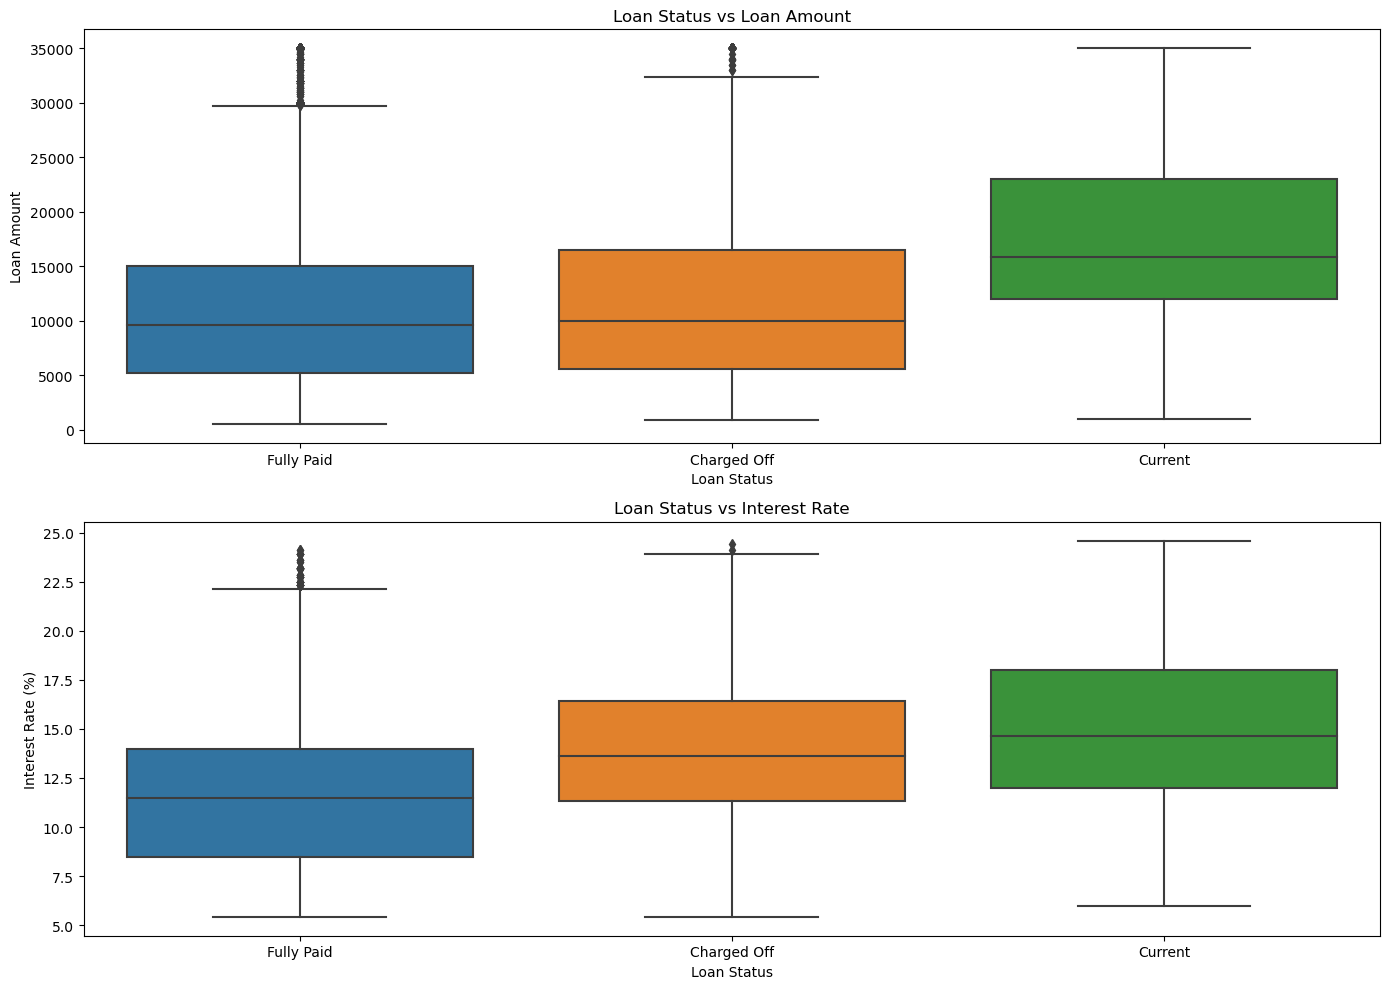

In [13]:
# Multivariate Analysis
# Multivariate Analysis: Loan Status, Loan Amount, and Interest Rate
plt.figure(figsize=(14, 10))

# Loan Status vs Loan Amount
plt.subplot(2, 1, 1)
sns.boxplot(x='loan_status', y='loan_amnt', data=loan_data_cleaned_var)
plt.title('Loan Status vs Loan Amount')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount')

# Loan Status vs Interest Rate
plt.subplot(2, 1, 2)
sns.boxplot(x='loan_status', y='int_rate', data=loan_data_cleaned_var)
plt.title('Loan Status vs Interest Rate')
plt.xlabel('Loan Status')
plt.ylabel('Interest Rate (%)')

plt.tight_layout()
plt.show()


## Multivariate Analysis: Annual Income, Loan Amount, and Loan Status
Variability Among Loan Statuses: While 'Fully Paid' and 'Charged Off' loans are distributed across the full range of incomes, 'Charged Off' loans are more prevalent at lower income levels.

Wide Range of Incomes and Loan Amounts: The scatterplot shows a broad range of both annual incomes and loan amounts across different loan statuses. This is indicating a diverse borrower base.

Correlation Between Income and Loan Amount: There appears to be a positive correlation between annual income and loan amount, with higher incomes generally associated with larger loan amounts.

Higher Loan Amounts in Certain Default Cases: For some 'Charged Off' loans, especially at lower income levels, the loan amounts are relatively high. This is suggesting potential over-leveraging of borrowers.

Income as a Factor in Loan Performance: While income is an important factor, the presence of 'Charged Off' loans across the income spectrum suggests that high income alone does not guarantee loan repayment.

Current Loans Distribution: Loans in the 'Current' status are spread across various income levels and loan amounts, with no clear distinction from 'Fully Paid' or 'Charged Off' loans.


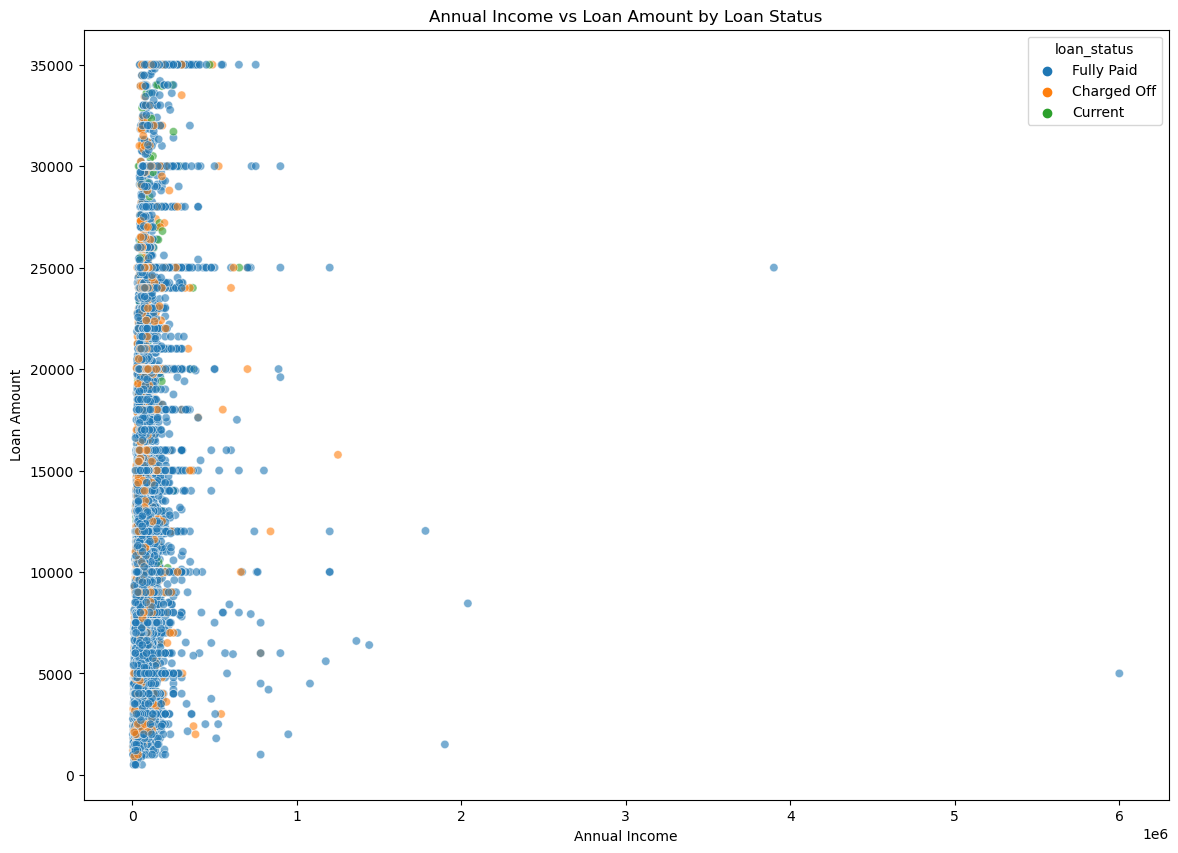

In [14]:
# Multivariate Analysis: Annual Income, Loan Amount, and Loan Status
plt.figure(figsize=(14, 10))
sns.scatterplot(x='annual_inc', y='loan_amnt', hue='loan_status', data=loan_data_cleaned_var, alpha=0.6)
plt.title('Annual Income vs Loan Amount by Loan Status')
plt.xlabel('Annual Income')
plt.ylabel('Loan Amount')
plt.show()



## Multivariate Analysis: Debt-to-Income Ratio, Loan Amount, and Loan Status
Fully Paid Loans Distribution: 'Fully Paid' loans are also distributed across the entire range of DTI ratios, which is indicating that a high DTI ratio does not singularly determine loan repayment success.

Higher Loan Amounts Across DTI Ranges: There is a wide range of loan amounts across different DTI ratios, indicating that loans are extended to borrowers with varied debt burdens.

Charged Off Loans' Characteristics: 'Charged Off' loans are present across all DTI levels, but they seem more concentrated in higher DTI ratios, suggesting that higher debt burdens might be linked to an increased likelihood of default.

Current Loans Distribution: Loans categorized as 'Current' are evenly spread across different DTI ratios and loan amounts. This is reflecting the ongoing status of these loans.

Risk Management Implications: While DTI is a critical factor in assessing borrowers' ability to manage new debt, this analysis suggests it should be considered alongside other factors, like loan amount, for a comprehensive risk assessment.

Interplay of Loan Amount and DTI: The relationship between loan amount and DTI for different loan statuses indicates that both factors, along with others, play a role in determining loan performance.

Distribution Across Loan Statuses: The scatterplot shows that loans of various amounts and DTI ratios are spread across all loan statuses, with no immediate, distinct pattern separating 'Fully Paid', 'Charged Off', and 'Current' loans.



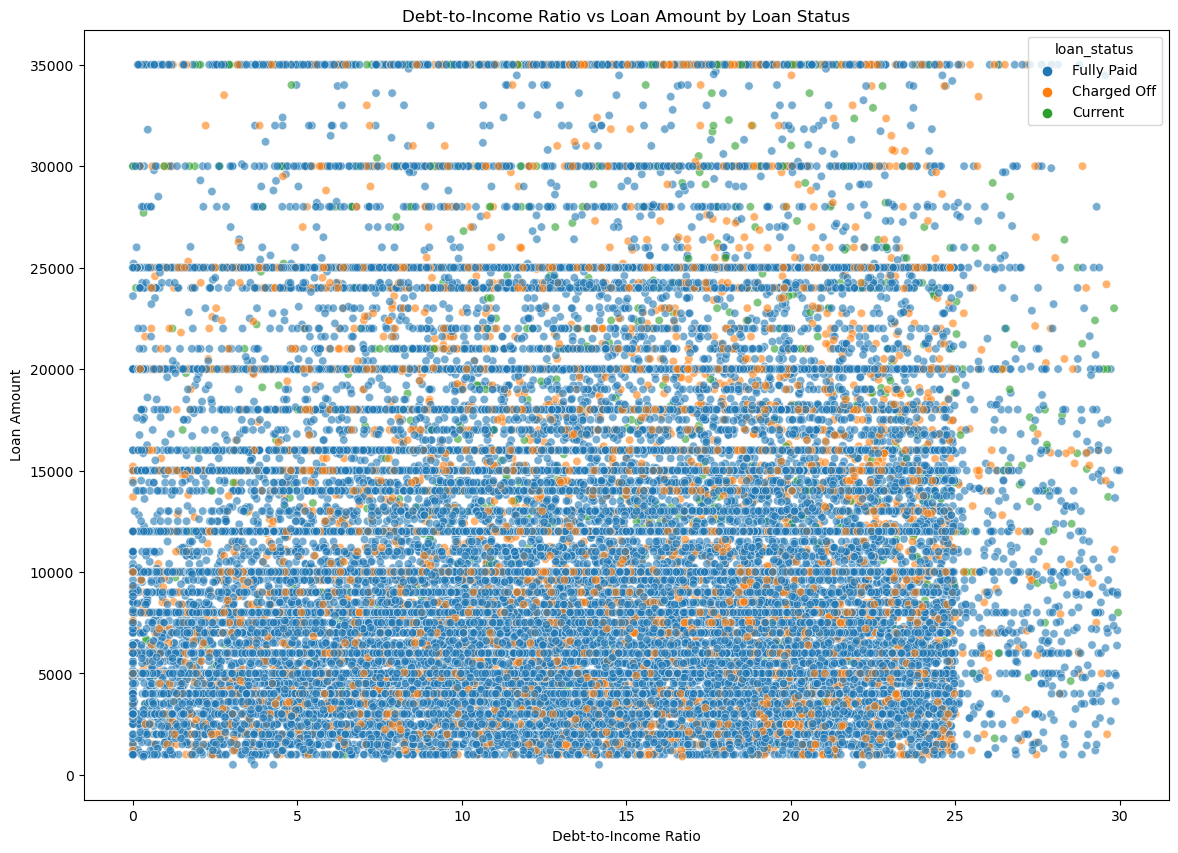

In [15]:
# Multivariate Analysis: Debt-to-Income Ratio, Loan Amount, and Loan Status
plt.figure(figsize=(14, 10))
sns.scatterplot(x='dti', y='loan_amnt', hue='loan_status', data=loan_data_cleaned_var, alpha=0.6)
plt.title('Debt-to-Income Ratio vs Loan Amount by Loan Status')
plt.xlabel('Debt-to-Income Ratio')
plt.ylabel('Loan Amount')
plt.show()
